#### Problem statement 
#### Analyze the heart disease dataset to explore the machine learning algorithms and build decision tree model to predict the disease.


In [1]:
### Import the required packages
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
# load data
df=pd.read_csv('HeartDisease.csv')

In [3]:
df.head()

age  gender  chest_pain  rest_bps  cholestrol  fasting_blood_sugar  \
0   63       1           3       145         233                    1   
1   37       1           2       130         250                    0   
2   41       0           1       130         204                    0   
3   56       1           1       120         236                    0   
4   57       0           0       120         354                    0   

   rest_ecg  thalach  exer_angina  old_peak  slope  ca  thalassemia  target  
0         0      150            0       2.3      0   0            1       1  
1         1      187            0       3.5      0   0            2       1  
2         0      172            0       1.4      2   0            2       1  
3         1      178            0       0.8      2   0            2       1  
4         1      163            1       0.6      2   0            2       1

In [4]:
df.shape

(303, 14)

In [8]:
df.dtypes

age                      int64
gender                   int64
chest_pain               int64
rest_bps                 int64
cholestrol               int64
fasting_blood_sugar      int64
rest_ecg                 int64
thalach                  int64
exer_angina              int64
old_peak               float64
slope                    int64
ca                       int64
thalassemia              int64
target                   int64
dtype: object

In [9]:
df.isnull().sum() # No null values

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

In [106]:
df.describe()

age      gender  chest_pain    rest_bps  cholestrol  \
count  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026   
std      9.082101    0.466011    1.032052   17.538143   51.830751   
min     29.000000    0.000000    0.000000   94.000000  126.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000   
max     77.000000    1.000000    3.000000  200.000000  564.000000   

       fasting_blood_sugar    rest_ecg     thalach  exer_angina    old_peak  \
count           303.000000  303.000000  303.000000   303.000000  303.000000   
mean              0.148515    0.528053  149.646865     0.326733    1.039604   
std               0.356198    0.525860   22.905161     0.469794    1.161075   
min               0.000000    0.000000   71.000000     0.000000    0.000000   
25%               0.000000    0.000000  133.500000     0.000000    0.000000   
50%               0.000000    1.000000  153.000000     0.000000    0.800000   
75%               0.000000    1.000000  166.000000     1.000000    1.600000   
max               1.000000    2.000000  202.000000     1.000000    6.200000   

            slope          ca  thalassemia      target  
count  303.000000  303.000000   303.000000  303.000000  
mean     1.399340    0.729373     2.313531    0.544554  
std      0.616226    1.022606     0.612277    0.498835  
min      0.000000    0.000000     0.000000    0.000000  
25%      1.000000    0.000000     2.000000    0.000000  
50%      1.000000    0.000000     2.000000    1.000000  
75%      2.000000    1.000000     3.000000    1.000000  
max      2.000000    4.000000     3.000000    1.000000

<AxesSubplot:xlabel='target', ylabel='count'>

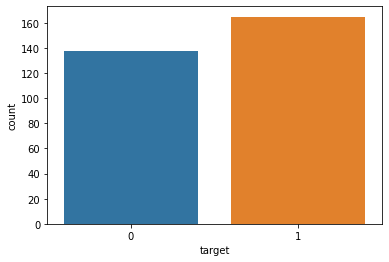

In [108]:
sns.countplot(x =df.target) # The data seems balanced 

In [109]:
sns.countplot(x=df.gender) 
# 0--> Male 1--> Female

<AxesSubplot:xlabel='gender', ylabel='count'>

In [113]:
df.chest_pain.value_counts()

0    143
2     87
1     50
3     23
Name: chest_pain, dtype: int64

In [114]:
sns.countplot(x=df.chest_pain)

<AxesSubplot:xlabel='chest_pain', ylabel='count'>

In [117]:
sns.pairplot(df, kind='kde' )

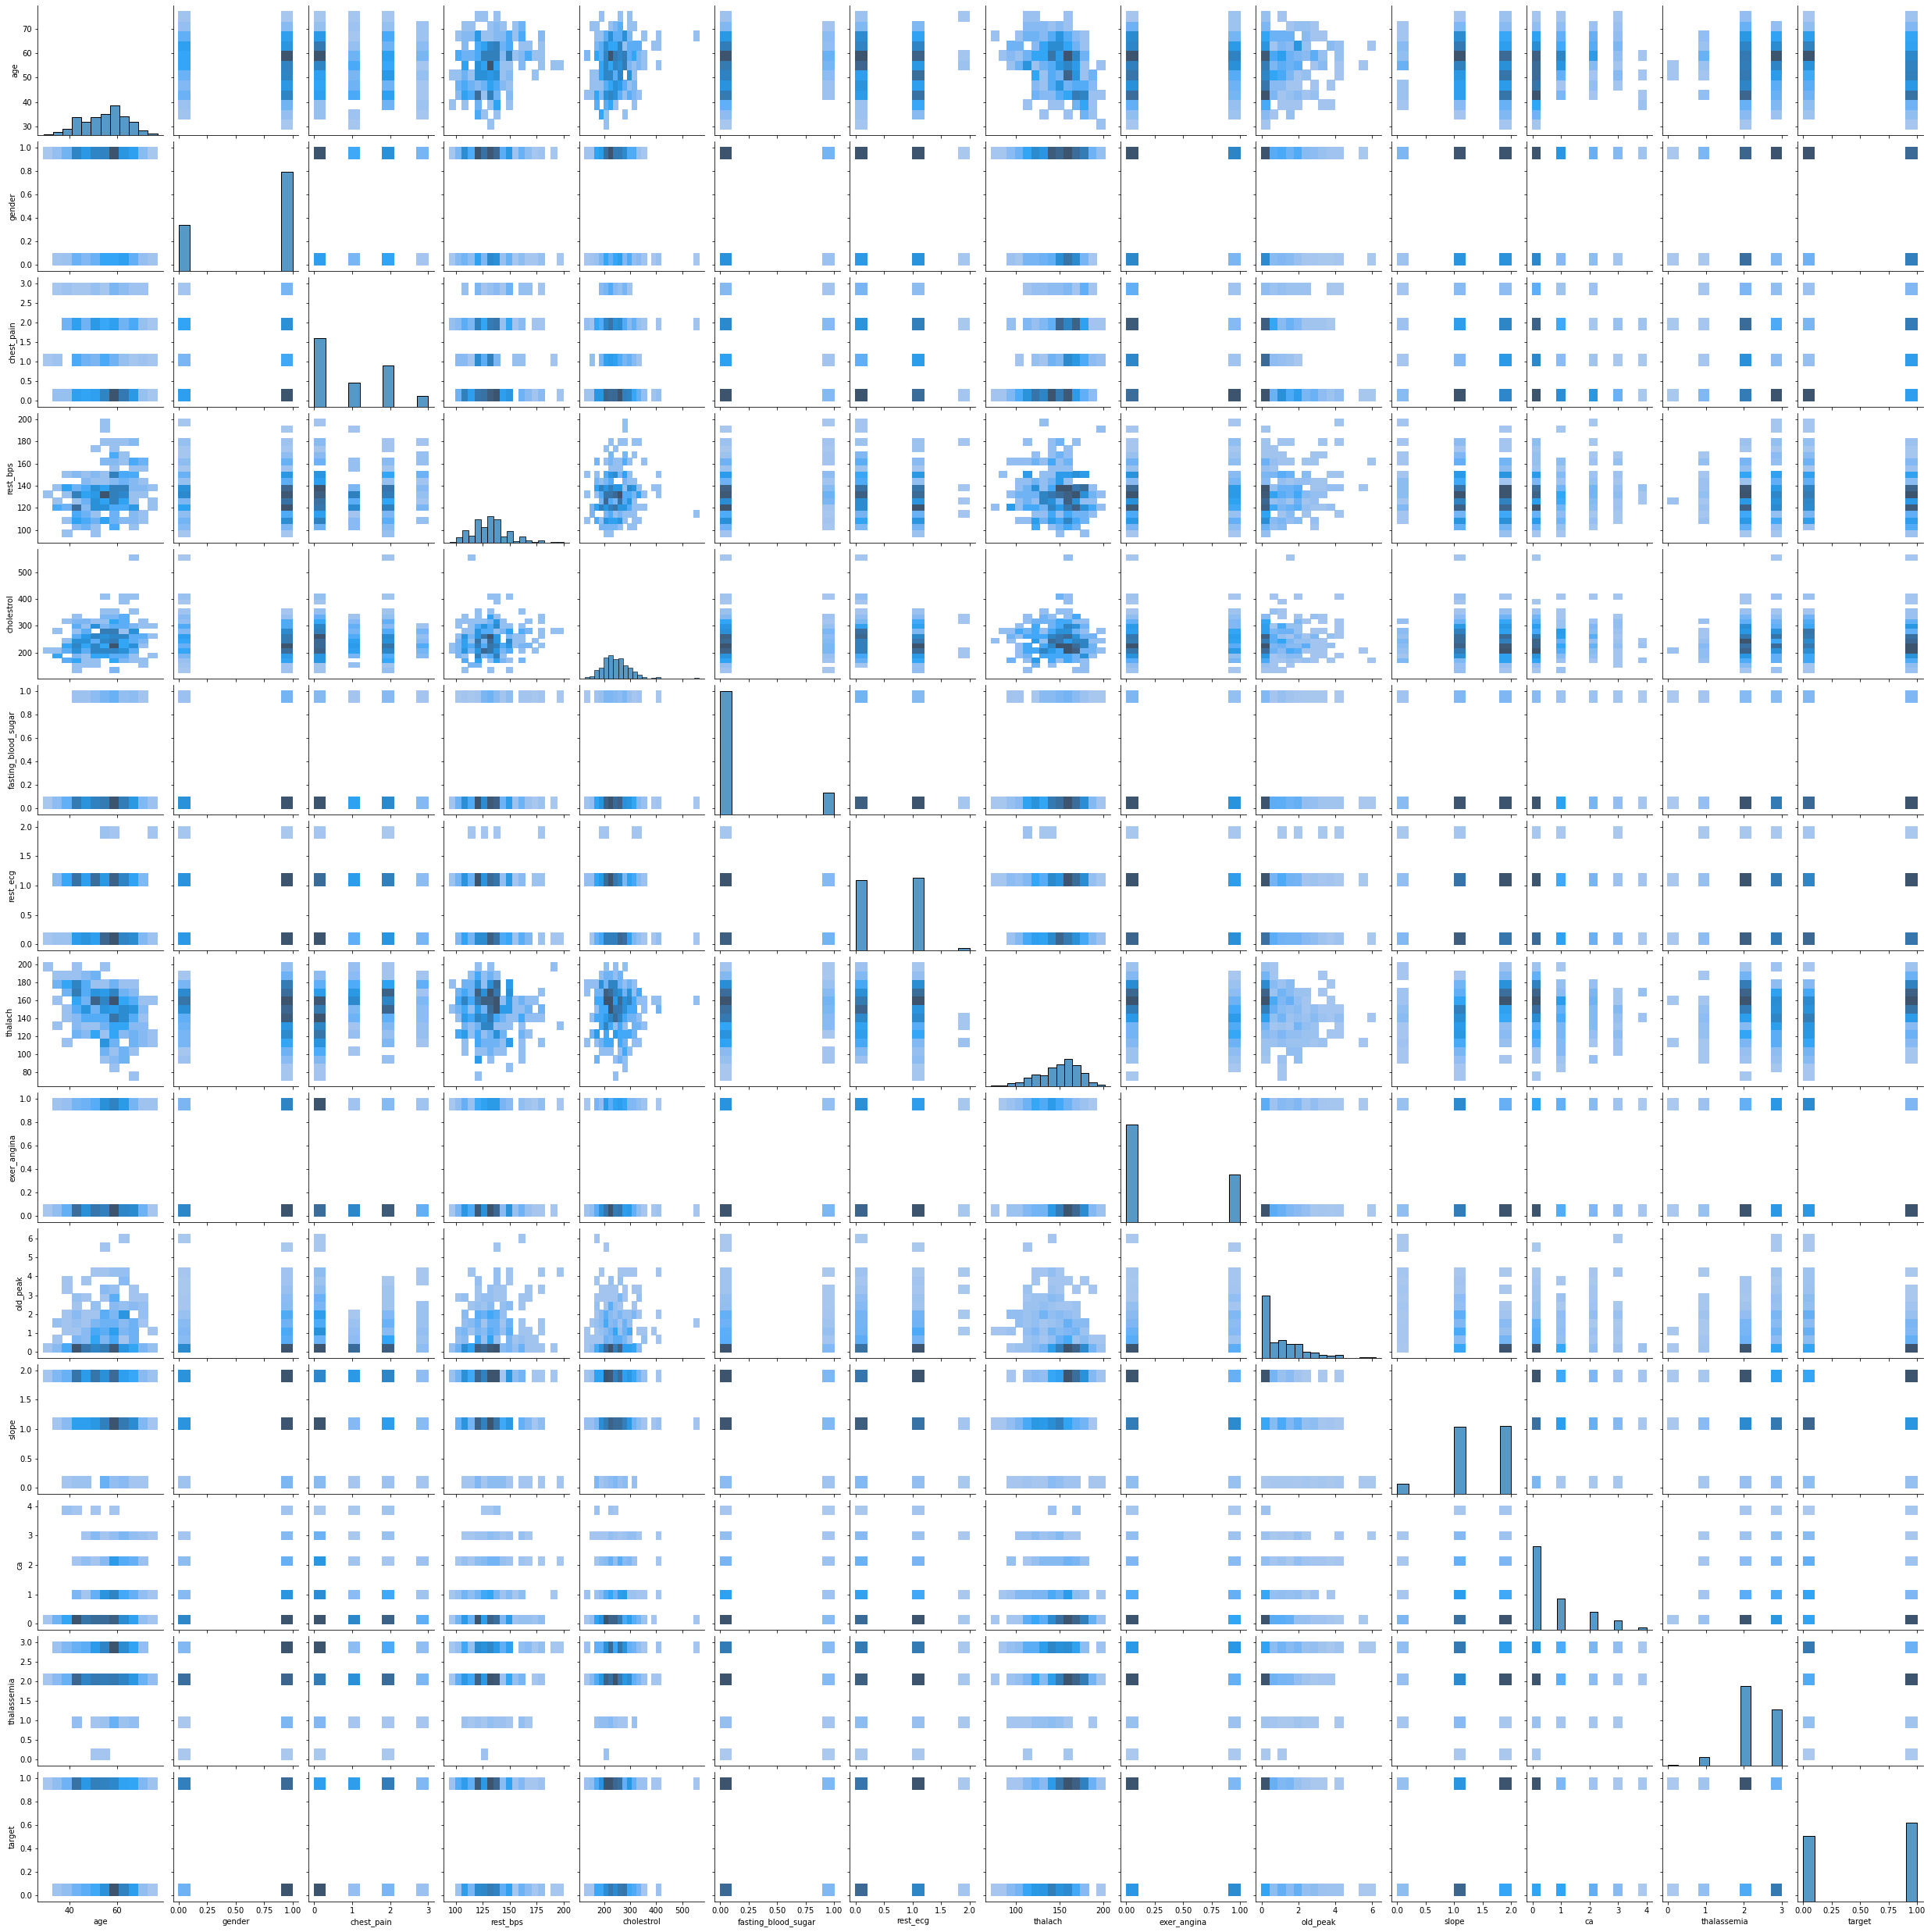

In [121]:
sns.pairplot(df, kind = 'hist')

### Split Data 

In [10]:
x=df.drop("target",axis=1)
y=df["target"]

In [11]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.30, random_state=0)

### Decision Tree Model

In [257]:
from sklearn.tree import DecisionTreeClassifier
dTree=DecisionTreeClassifier(criterion="entropy",max_depth=6, max_features=4, min_samples_leaf=5, random_state = 22)
dTree.fit(x_train,y_train)
dTree.score(x_train,y_train)


0.8512396694214877

In [258]:
dTree.score(x_test,y_test)

0.819672131147541

In [ ]:
# if you change the parameters like max_depth, max_features, etc the scores are correspondingly changing. 
# So, I have fixed the parameters as below and got the mentioned score. 

# Result
#### criterion="entropy",max_depth=3, max_features=5, min_samples_leaf=10
#### train - 0.8490566037735849
#### test - 0.8131868131868132

In [122]:
### Trying to fit the model with Logistic Regression

In [123]:
model=LogisticRegression()
model.fit(x_train,y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [124]:
predictions=model.predict(x_test)

In [125]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.8351648351648352